In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mp
import xlrd

# Data to be visualized is Canada's immgration Trend from 1980 - 2013 

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [11]:
df_can.head(10)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
5,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45
6,Immigrants,Foreigners,Antigua and Barbuda,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,...,14,24,32,15,32,38,27,37,51,25
7,Immigrants,Foreigners,Argentina,904,Latin America and the Caribbean,931,South America,902,Developing regions,368,...,1591,1153,847,620,540,467,459,278,263,282
8,Immigrants,Foreigners,Armenia,935,Asia,922,Western Asia,902,Developing regions,0,...,147,224,218,198,205,267,252,236,258,207
9,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,...,930,909,875,1033,1018,1018,933,851,982,1121


In [12]:
df_can.shape

(195, 43)

### 1. Clean up the dataset to remove columns that are not informative to us for visualization

In [13]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True) # remove unnecessary columns

In [14]:
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [15]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True) # rename columns

In [16]:
df_can.columns = list(map(str, df_can.columns)) # make all column labels string typed

In [17]:
df_can.set_index('Country', inplace=True) # set index to be 'Country'

In [18]:
df_can['Total'] = df_can.sum(axis=1) # create a Total column

In [19]:
df_can.sort_values(['Total'], ascending = False, inplace = True) # sort values by total number of immigrants

In [20]:
df_top5 = df_can.head()

years = list(map(str, range(1980, 2014)))

df_top5 = df_top5[years].transpose() # transpose the table so the rows are years, and the comparable columns are Countries

df_top5.head() # take a peak at the first 5 rows


Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


## Area Graph

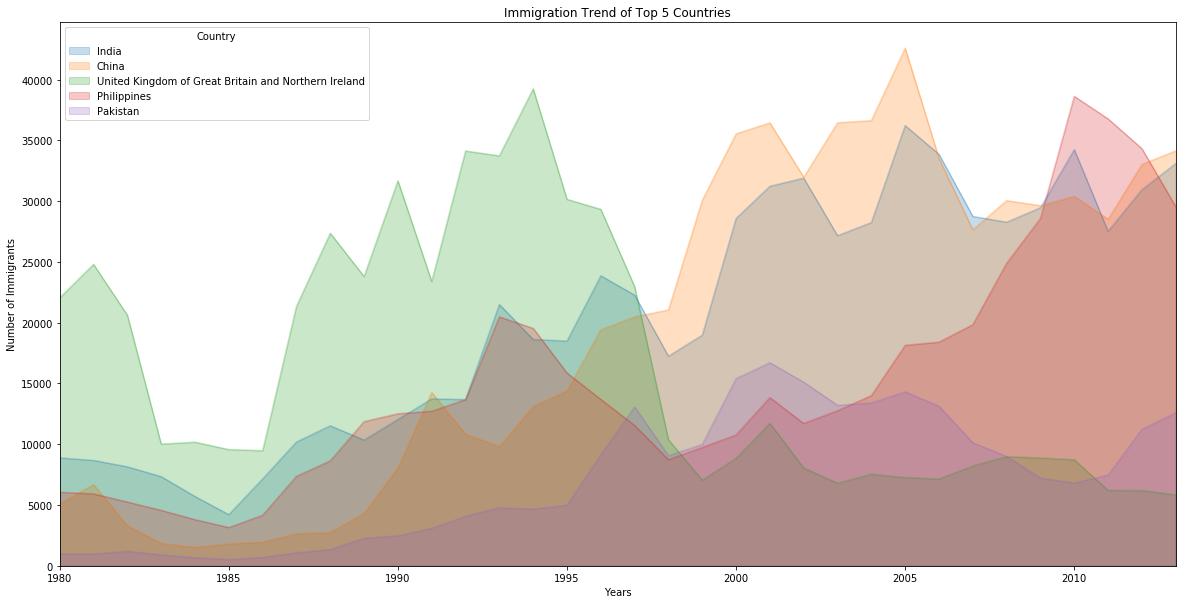

In [21]:
# Optional: df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting

df_top5.plot(kind='area', 
             stacked=False,
             alpha = 0.25, # transparency (by default, alpha = 0.5)
             figsize=(20, 10), # pass a tuple (x, y) size
             )  # plot an Area graph

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45

In [22]:
df_can.sort_values('Total', inplace = True) # sort data based on Total immigrants
df_last5 = df_can.head()                  # and then extract the first five rows and store in df_last5

df_last5.drop(['Continent','Region','DevName'], axis = 1, inplace = True) # drop the unnecessary columns for plotting

years = list(map(str, range(1980,2014)))
df_last5 = df_last5[years].transpose() # transpose the table


c:\users\tram ngo\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Text(0.5, 1.0, 'Immigration Trends of the last 5 countries')

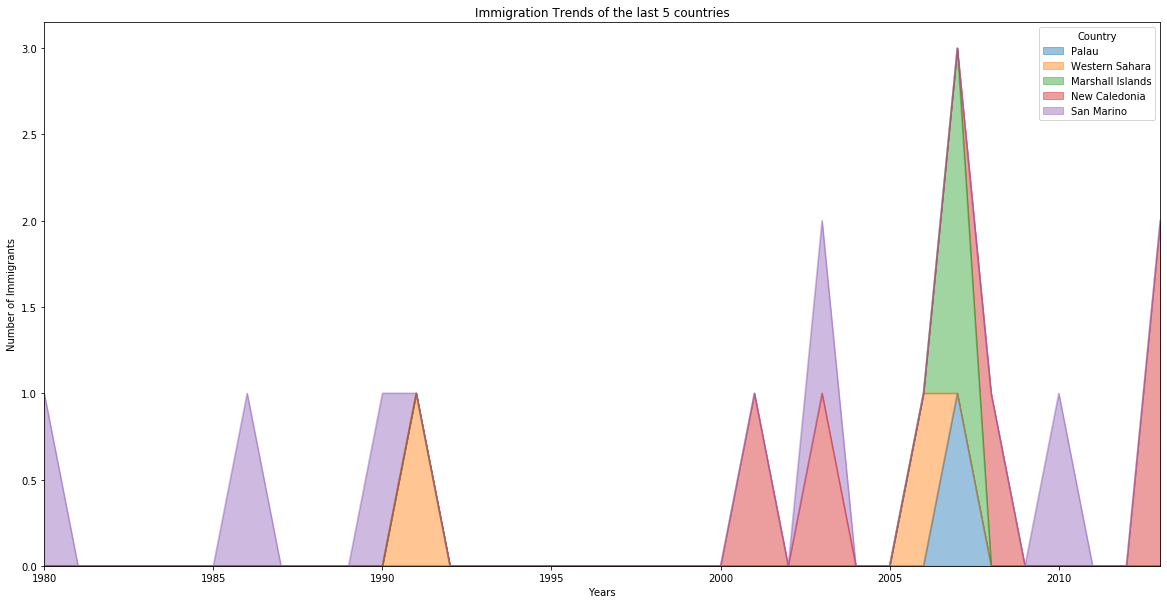

In [23]:
# plotting a Stacked area map

df_last5.plot(kind = 'area', alpha = 0.45, figsize = (20,10))

plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.title('Immigration Trends of the last 5 countries')


Text(0.5, 1.0, 'Immigration Trends of the last 5 countries')

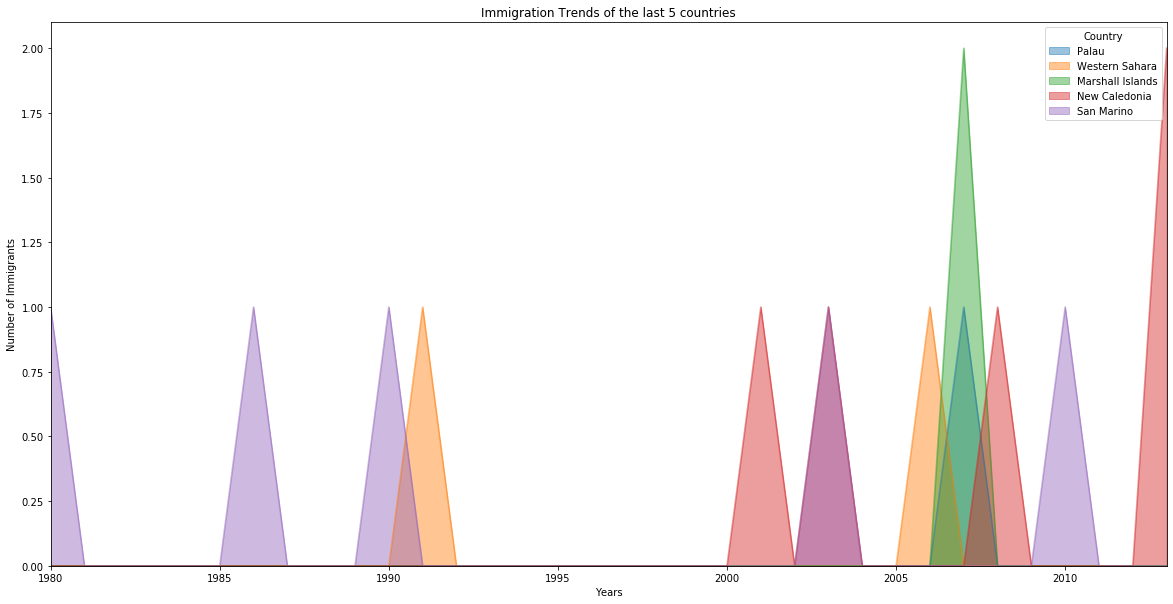

In [24]:
# Plot an unstacked area graph

df_last5.plot(stacked = False, kind = 'area', alpha = 0.45, figsize = (20,10))

plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.title('Immigration Trends of the last 5 countries')

## Historgram



### Question: What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?



In [29]:
df_can['2013'] # take a look at '2013' data

Country
Palau                                                       0
Western Sahara                                              0
Marshall Islands                                            0
New Caledonia                                               2
San Marino                                                  0
American Samoa                                              0
Tuvalu                                                      0
Sao Tome and Principe                                       1
Vanuatu                                                     0
Kiribati                                                    0
Andorra                                                     1
Nauru                                                       1
Canada                                                      2
Monaco                                                      1
Maldives                                                    1
Liechtenstein                                               0


In [30]:
import numpy as np

count, bin_edges = np.histogram(df_can['2013']) # create bin ranges and frequency count

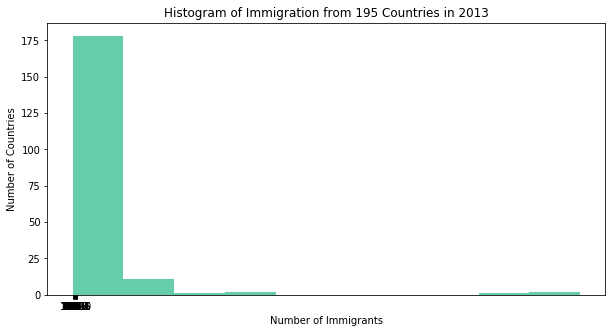

In [67]:
df_can['2013'].plot(kind = 'hist', color = 'mediumaquamarine', figsize = (10,5), xticks = bin_edges) # <-- x-axis is divided into chunks equal to the bin size)

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

### We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram:

What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [48]:
# first, let's look at the data for those countries 

df_can.loc[['Denmark','Norway','Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


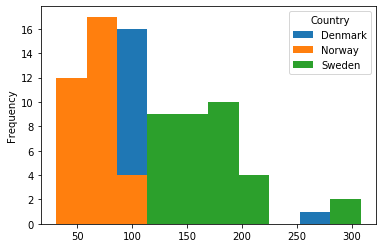

In [52]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

df_t.plot(kind = 'hist')

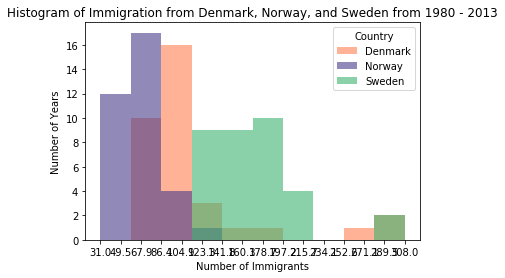

In [62]:
# We can improve the histogram above as followed

count, bin_edges = np.histogram(df_t,bins = 15)


df_t.plot(kind = 'hist', xticks = bin_edges, alpha = 0.6, color = ['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

# Bar Charts

### Question: Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013

In [84]:
df_iceland = df_can.loc['Iceland', years]

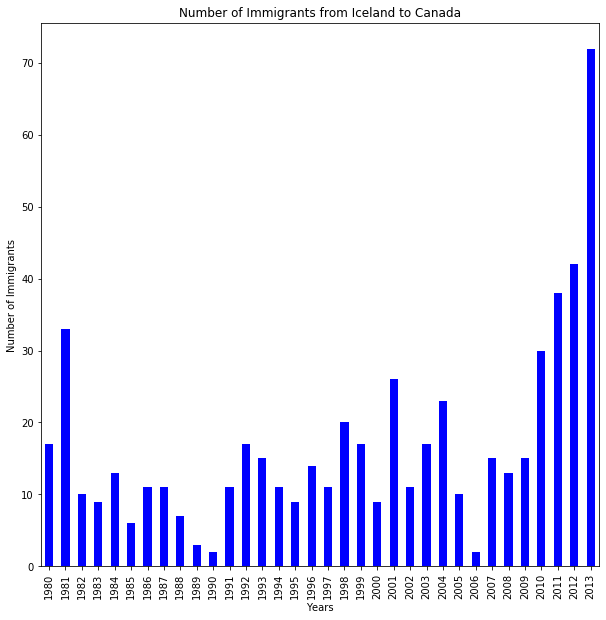

In [98]:
df_iceland.plot(kind = 'bar', color = 'blue', figsize = (10,10))


plt.title('Number of Immigrants from Iceland to Canada')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

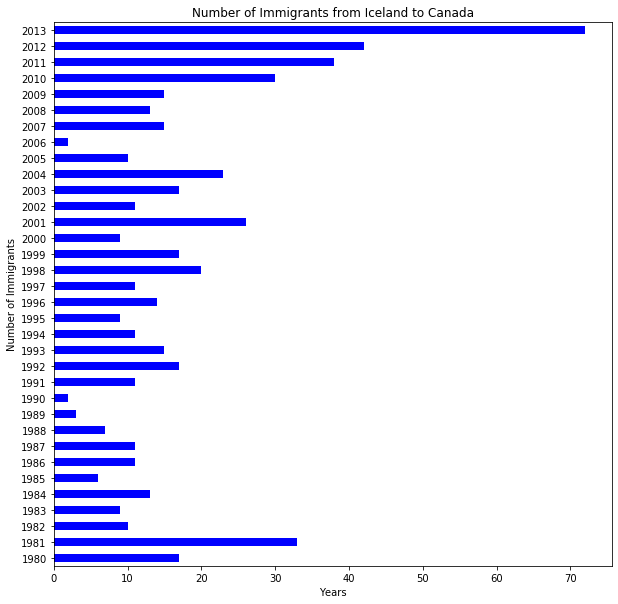

In [99]:
df_iceland.plot(kind = 'barh', color = 'blue', figsize = (10,10))


plt.title('Number of Immigrants from Iceland to Canada')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()